In [ ]:
!apt-get update && apt-get install ffmpeg freeglut3-dev xvfb  # For visualization
!pip install "stable-baselines3"
!pip install swig
!pip install gymnasium[box2d]

   0% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170/200,000  [ 0:00:19 < 1:44:33 , 32 it/s ]

In [ ]:
import torch
import stable_baselines3
import gymnasium as gym
import numpy as np
from stable_baselines3 import SAC
import os
import matplotlib.pyplot as plt

from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common import results_plotter
from stable_baselines3.common.results_plotter import load_results, ts2xy

print(f"{gym.__version__=}")
print(f"{stable_baselines3.__version__=}")

%matplotlib inline

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.125.1
0% [Connecting to archive.ubuntu.com (185.125.190.36)] [Connecting to security.ubuntu.com (185.1

stable_baselines3.__version__='2.3.2'

1.

In [ ]:
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

In [ ]:
env = gym.make("MountainCarContinuous-v0", render_mode="rgb_array")
model = SAC("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10_000, log_interval=4)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -33.1    |
| time/              |          |
|    episodes        | 4        |
|    fps             | 71       |
|    time_elapsed    | 55       |
|    total_timesteps | 3996     |
| train/             |          |
|    actor_loss      | -6.48    |
|    critic_loss     | 0.00482  |
|    ent_coef        | 0.311    |
|    ent_coef_loss   | -1.94    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3895     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -31.2    |
| time/              |          |
|    episodes        | 8        |
|    fps             | 77       |
|    time_elapsed    | 103      |
|    total_timesteps | 7992     |
| train/             

# Question 3b

In [ ]:
# Create and wrap the environment
env = gym.make("MountainCarContinuous-v0", render_mode="rgb_array")
env = Monitor(env, log_dir)

# Create action noise
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))
# Create the callback: check every 1000 steps
# callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir)

# Create RL model
model = SAC('MlpPolicy', env, action_noise=action_noise, verbose=0)
# Train the agent
model.learn(total_timesteps=int(5e4))

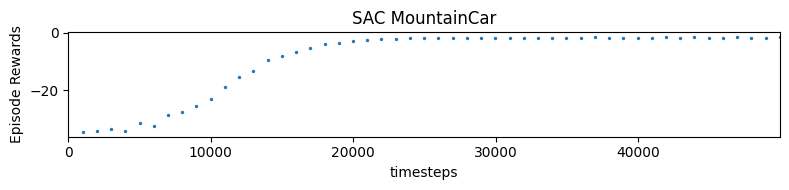

In [ ]:
# Helper from the library
results_plotter.plot_results(
    [log_dir], 1e5, results_plotter.X_TIMESTEPS, "SAC MountainCar"
)

# Question 3 c

Fixing `ent_coef=10`.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


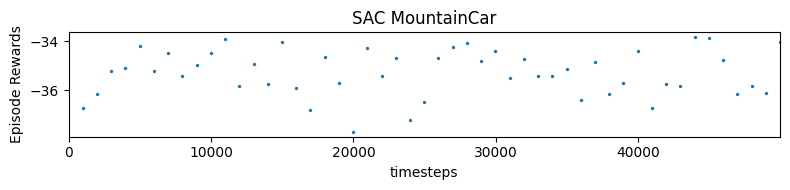

In [ ]:
# Create and wrap the environment
env = gym.make("MountainCarContinuous-v0", render_mode="rgb_array")
env = Monitor(env, log_dir)

# Create RL model
model = SAC('MlpPolicy', env, action_noise=action_noise, verbose=0, ent_coef=10.)
# Train the agent
model.learn(total_timesteps=int(5e4))

# Plot
results_plotter.plot_results(
    [log_dir], 1e5, results_plotter.X_TIMESTEPS, "SAC MountainCar"
)

`γ = 0.999`

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


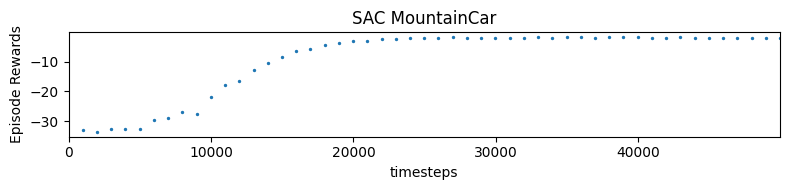

In [ ]:
# Create and wrap the environment
env = gym.make("MountainCarContinuous-v0", render_mode="rgb_array")
env = Monitor(env, log_dir)

# Create RL model
model = SAC('MlpPolicy', env, action_noise=action_noise, verbose=0, gamma=.999)
# Train the agent
model.learn(total_timesteps=int(5e4))

# Plot
results_plotter.plot_results(
    [log_dir], 1e5, results_plotter.X_TIMESTEPS, "SAC MountainCar"
)

Adjusting network architecture

In [ ]:
# Create and wrap the environment
env = gym.make("MountainCarContinuous-v0", render_mode="rgb_array")
env = Monitor(env, log_dir)

# Create RL model
policy_kwargs = dict(activation_fn=torch.nn.ReLU, net_arch=dict(pi=[32, 32], qf=[32, 32]))
model = SAC('MlpPolicy', env, action_noise=action_noise, verbose=0, policy_kwargs=policy_kwargs)
# Train the agent
model.learn(total_timesteps=int(5e4))

# Plot
results_plotter.plot_results(
    [log_dir], 1e5, results_plotter.X_TIMESTEPS, "SAC MountainCar"
)

## Working set of hyperparameters

MountainCar is somehow hard for SAC because of its reward function, which requires a lot of exploration.

This means that the default set of hyperparameters is not working. Instead, you can use the following set. The main changes are to

1. Use a smaller network
2. Enable `use_sde`: This adds exploration behaviour
3. Accumulate the gradient steps

Using cuda device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 862      |
|    ep_rew_mean     | 43.9     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 77       |
|    time_elapsed    | 44       |
|    total_timesteps | 3448     |
| train/             |          |
|    actor_loss      | 1.31     |
|    critic_loss     | 3.65     |
|    ent_coef        | 0.0532   |
|    ent_coef_loss   | -3.96    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3328     |
|    std             | 0.0533   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 820      |
|    ep_rew_mean     | 52.3     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 77       |
|    time_elapsed    | 85       |
|    total_timesteps | 6560     |
| train/             |       

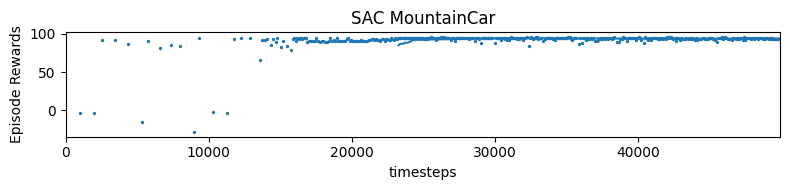

In [ ]:
# Create and wrap the environment
env = gym.make("MountainCarContinuous-v0", render_mode="rgb_array")
env = Monitor(env, log_dir)

# Make network smaller
policy_kwargs = dict(
    activation_fn=torch.nn.ReLU,
    net_arch=[32, 32],
)

# Create SB3 model
model = SAC(
    'MlpPolicy',
    env,
    verbose=1,
    policy_kwargs=policy_kwargs,
    use_sde=True,         # Exploration is really important for MountainCar
    gamma=0.9999,         # Discounting should not be too string to anticipate future rewarding states
    gradient_steps=32,    # Do 1 grad step per env step, but accumulate them. Really makes a difference!
    train_freq=32,
    tau=0.01,
    ent_coef='auto_0.1',
    seed=42
)

# Train the agent
model.learn(total_timesteps=int(5e4))

# Plot
results_plotter.plot_results(
    [log_dir], 1e5, results_plotter.X_TIMESTEPS, "SAC MountainCar"
)